## What Are The Most Optimal Skills for Data Analysts?

### Methodology

1. Group skills to determine median salary vs. likelihood of skill being in posting.
2. Visualize median salary vs. percent skill demand.
3. Determine if certain technologies are more prevalent.

In [2]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy() #filtering US Data Analyst roles
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US= df_DA_US.explode('job_skills') #exploding the job skills column will match each skill to its corresponding job title
df_DA_skills= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False) 
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'}) #renamed columns to avoid confusion


In [4]:
DA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count * 100 #calculating skill  percentage

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,14.380734
excel,1808,84392.0,10.366972
python,1431,97500.0,8.205275
tableau,1364,92875.0,7.821101
sas,926,90000.0,5.309633
...,...,...,...
couchbase,1,160515.0,0.005734
chainer,1,100000.0,0.005734
chef,1,85000.0,0.005734


In [8]:
df_skills_cutoff = 5

df_DA_skills_demand = df_DA_skills[df_DA_skills['skill_percent'] > 1.2]
df_DA_skills_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,14.380734
excel,1808,84392.00,10.366972
python,1431,97500.00,8.205275
tableau,1364,92875.00,7.821101
sas,926,90000.00,5.309633
r,893,92500.00,5.120413
power bi,838,90000.00,4.805046
powerpoint,462,85000.00,2.649083
word,461,81194.75,2.643349


In [9]:
df_technology = df['job_type_skills'].copy()

#remove duplicates
df_technology = df_technology.drop_duplicates()

#remove NaN vaklues
df_technology =df_technology.dropna() 

#combine all dictionaries into one

tech_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))
tech_dict

{'analyst_tools': ['powerbi',
  'msaccess',
  'outlook',
  'sharepoint',
  'nuix',
  'power bi',
  'tableau',
  'powerpoint',
  'looker',
  'cognos',
  'ms access',
  'excel',
  'splunk',
  'ssrs',
  'sap',
  'esquisse',
  'qlik',
  'microstrategy',
  'alteryx',
  'sas',
  'dax',
  'datarobot',
  'spreadsheet',
  'word',
  'spss',
  'visio',
  'ssis',
  'sheets'],
 'programming': ['groovy',
  'haskell',
  'lua',
  'css',
  'java',
  'ocaml',
  'elixir',
  'kotlin',
  'shell',
  'sql',
  'mongo',
  'rust',
  'cobol',
  'mongodb',
  'fortran',
  'lisp',
  'c#',
  'golang',
  'f#',
  'clojure',
  'php',
  'typescript',
  'objective-c',
  'solidity',
  'erlang',
  'perl',
  'matlab',
  'swift',
  'dart',
  'assembly',
  'apl',
  'python',
  'no-sql',
  'julia',
  'visual basic',
  'sass',
  'visualbasic',
  'delphi',
  'html',
  'vba',
  'javascript',
  'bash',
  'powershell',
  'sas',
  'vb.net',
  't-sql',
  'go',
  'pascal',
  'r',
  'nosql',
  'c++',
  'scala',
  'c',
  'crystal',
  'r

In [10]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

df_tech = df_tech.explode('skills')

df_tech

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,msaccess
0,analyst_tools,outlook
0,analyst_tools,sharepoint
0,analyst_tools,nuix
...,...,...
9,sync,webex
9,sync,symphony
9,sync,wire
9,sync,twilio


In [11]:
df_DA_skills_demand.merge(df_tech, left_on='job_skills', right_on='skills')

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,14.380734,programming,sql
1,1808,84392.00,10.366972,analyst_tools,excel
2,1431,97500.00,8.205275,programming,python
3,1364,92875.00,7.821101,analyst_tools,tableau
4,926,90000.00,5.309633,analyst_tools,sas
5,926,90000.00,5.309633,programming,sas
6,893,92500.00,5.120413,programming,r
7,838,90000.00,4.805046,analyst_tools,power bi
8,462,85000.00,2.649083,analyst_tools,powerpoint
9,461,81194.75,2.643349,analyst_tools,word


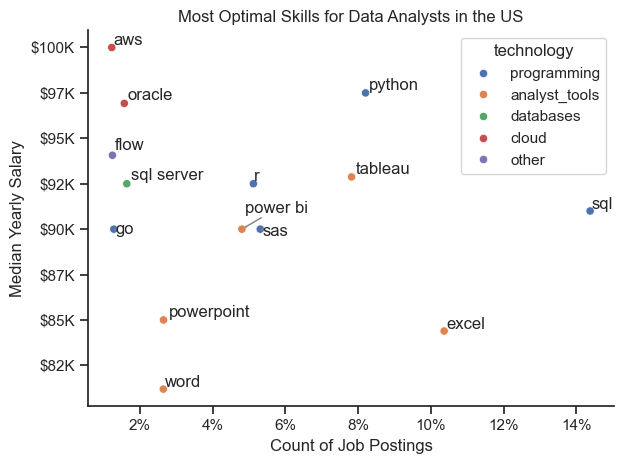

In [ ]:
df_plot = df_DA_skills_demand.merge(df_tech, left_on='job_skills', right_on='skills')

from adjustText import adjust_text
sns.scatterplot(
    data=df_plot, 
    x='skill_percent',
    y='median_salary',
    hue='technology'
    )
sns.set_theme(style='ticks')
sns.despine()
texts = []
for i, txt in enumerate(df_DA_skills_demand.index):
    if i == 4: ##this was done due to powerBI and sas texts were overlapping
        texts.append(plt.text(df_DA_skills_demand['skill_percent'].iloc[i], df_DA_skills_demand['median_salary'].iloc[i]-1, txt))
    else:
        texts.append(plt.text(df_DA_skills_demand['skill_percent'].iloc[i], df_DA_skills_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color = 'gray', lw=1))
ax = plt.gca() #allows you to get the current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) #we grab the y-axis and apply a function to format the numbers
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()